###  Haberman's Survival Data
* This dataset contains information about patients who had surgery for breast cancer between 1958 and 1970.
* It has 305 data points 
* Columns in dataset are as follow:
    * Age of patient
    * Year in which they had surgery
    * Number of Axillary nodes :  https://en.wikipedia.org/wiki/Axillary_lymph_nodes
    * Survival status
        * 1 = Patients who survived after operation.
        * 2 = Patients who didn't survive after operation.
    
* Objective: Classify patient into 2 classes by observing given 3 features.

In [0]:
#import requiered libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Access dataset file using pandas
canc_dataset = pd.read_csv("/content/gdrive/My Drive/ColabNotebooks/habermans-survival-data-set/haberman.csv",header=None,
                           names=['age','operation_year','axillary_nodes','survival_status'])

In [35]:
#Lets see how dataset look like
canc_dataset.head(5)


,age,operation_year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [33]:
#Lets count how many data  points each class has
canc_dataset['survival_status'].value_counts()

#Haberman's this cancer data set is imbalanced dataset as class 1 has more data point than class 2

1    225
2     81
Name: survival_status, dtype: int64

In [32]:
canc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
axillary_nodes     306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


### Objective:
* Classify patient into 2 classes (1:"survivor", 2:"non_survivor) by observing given 3 (age, operation_year, axillary_nodes) features.
* To classify given patient's case in one of the classes we need to identify which independent 
  varibles (age, operation_year, axillary_nodes) are affecting  dependant varible (survival_status).

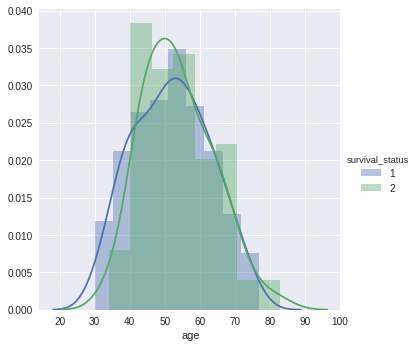

In [8]:
#PDF of Age
sns.FacetGrid(canc_dataset,hue="survival_status",size=5).map(sns.distplot, 'age').add_legend()

plt.show()

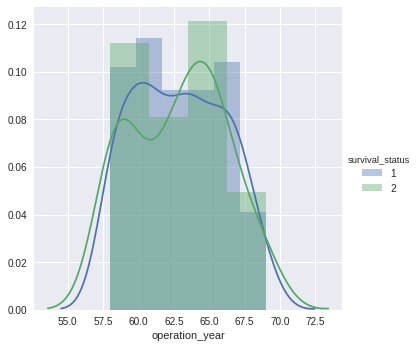

In [9]:
#PDF of operation_year
sns.FacetGrid(canc_dataset,hue="survival_status",size=5).map(sns.distplot,'operation_year').add_legend()
plt.show()

[]

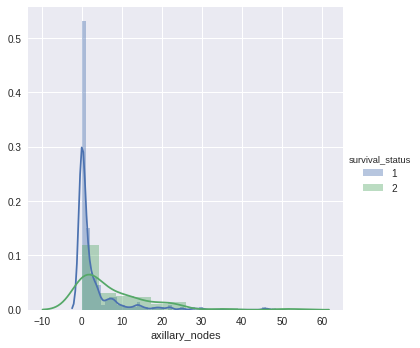

In [10]:
#PDF of axillary_nodes
sns.FacetGrid(canc_dataset,hue='survival_status',size=5).map(sns.distplot,'axillary_nodes').add_legend()
plt.plot()

## CDF for age, operation_year and axillary_nodes

In [0]:
canc_survivor_data = canc_dataset[canc_dataset["survival_status"] == 1]
canc_nonsurvivor_data = canc_dataset[canc_dataset["survival_status"] == 2]

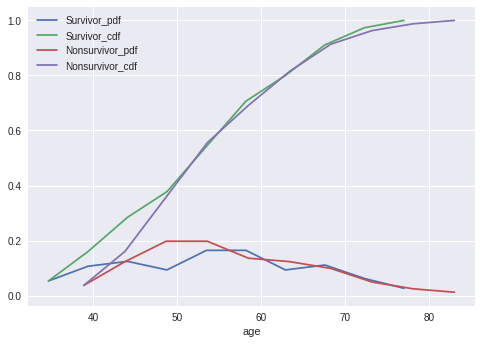

In [22]:
#age
counts, bin_borders = np.histogram(canc_survivor_data['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_borders[1:],pdf,label='Survivor_pdf')
plt.plot(bin_borders[1:], cdf,label='Survivor_cdf')

counts, bin_borders = np.histogram(canc_nonsurvivor_data['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_borders[1:],pdf,label='Nonsurvivor_pdf')
plt.plot(bin_borders[1:], cdf,label='Nonsurvivor_cdf')
plt.xlabel('age')
plt.legend(loc='upper left')

plt.show()

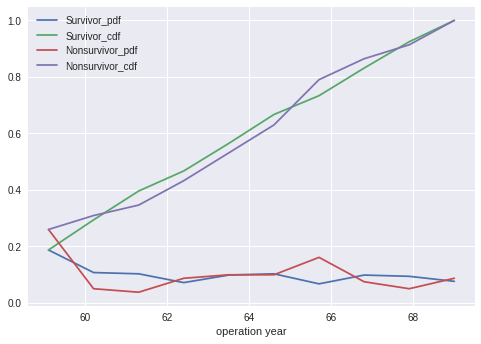

In [24]:
#operation_year
counts, bin_borders = np.histogram(canc_survivor_data['operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_borders[1:],pdf,label='Survivor_pdf')
plt.plot(bin_borders[1:], cdf,label='Survivor_cdf')

counts, bin_borders = np.histogram(canc_nonsurvivor_data['operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_borders[1:],pdf,label='Nonsurvivor_pdf')
plt.plot(bin_borders[1:], cdf,label='Nonsurvivor_cdf')
plt.xlabel('operation year')
plt.legend(loc='upper left')
plt.show()

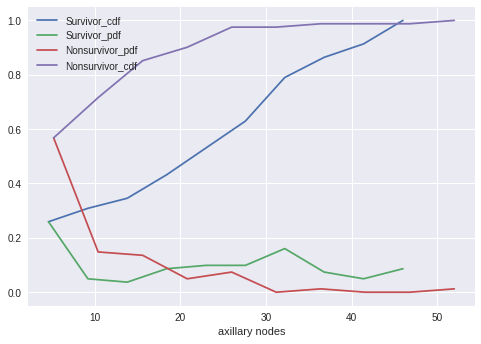

In [25]:
#axillary_nodes
count, bin_borders = np.histogram(canc_survivor_data['axillary_nodes'], bins = 10,
                                  density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_borders[1:],cdf,label='Survivor_cdf')
plt.plot(bin_borders[1:],pdf,label='Survivor_pdf')


counts, bin_borders = np.histogram(canc_nonsurvivor_data['axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_borders[1:],pdf,label='Nonsurvivor_pdf')
plt.plot(bin_borders[1:], cdf,label='Nonsurvivor_cdf')
plt.xlabel('axillary nodes')
plt.legend(loc='upper left')
plt.show()

## Violin Plots 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


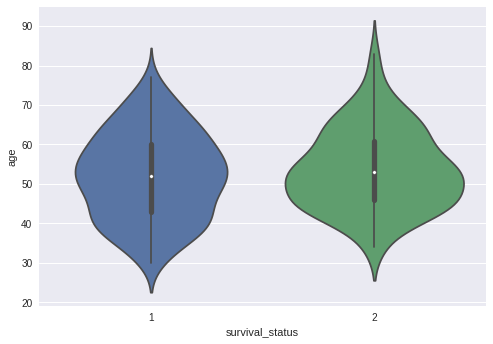

In [28]:
#age

sns.violinplot(x="survival_status", y="age", data=canc_dataset, size=8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


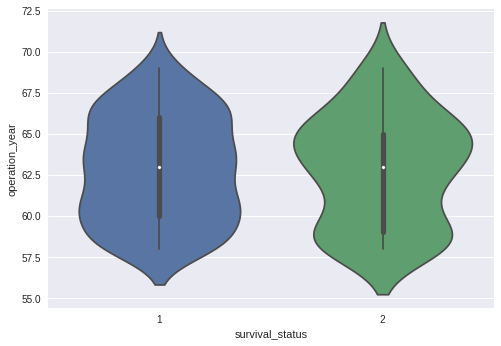

In [25]:
#operation_year
sns.violinplot(x="survival_status", y="operation_year", data=canc_dataset, size=8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


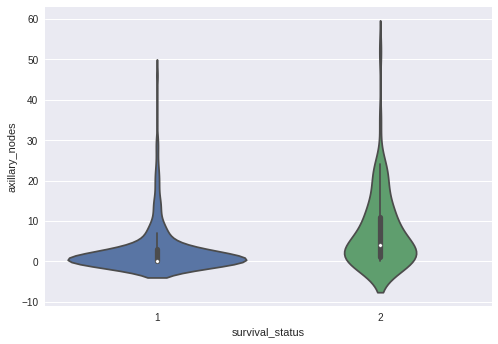

In [29]:
#axillary_nodes
sns.violinplot(x="survival_status", y="axillary_nodes", data=canc_dataset, size=8)

**Observations:**
  * PDF of all  features are overlapping with each other for given two classes.
  * In violin plot median of age, year and axillary nodes are quite close for the survival and non survival classes. Also data points of all features are saturated in same range for both classes.
  * There is no individual feature which can be used to define condition for separating patients who survived and who didn't.


## Bivariate Analysis
###      Scatter plots

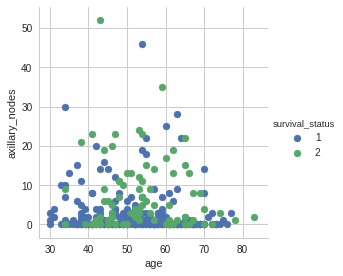

In [30]:

sns.set_style("whitegrid");
sns.FacetGrid(canc_dataset, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "axillary_nodes") \
   .add_legend();
plt.show();

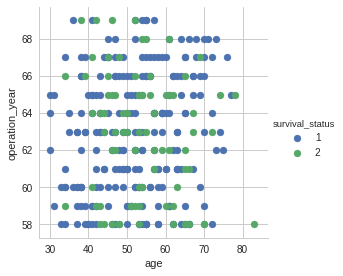

In [31]:
sns.set_style("whitegrid");
sns.FacetGrid(canc_dataset, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "operation_year") \
   .add_legend();
plt.show();

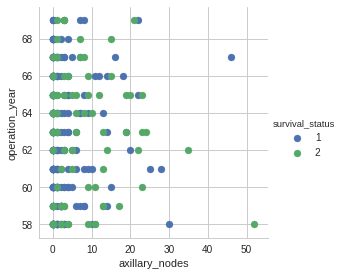

In [32]:
sns.set_style("whitegrid");
sns.FacetGrid(canc_dataset, hue="survival_status", size=4) \
   .map(plt.scatter, "axillary_nodes", "operation_year") \
   .add_legend();
plt.show();

### Pair-plot

In [69]:
canc_dataset.head()


,age,operation_year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [77]:
set_val = {1:"survivor",2:"non_survivor"}
canc_dataset=canc_dataset.replace({"survival_status":set_val})
canc_dataset["survival_status"] = canc_dataset["survival_status"].astype('category')
canc_dataset.head()

,age,operation_year,axillary_nodes,survival_status
0,30,64,1,survivor
1,30,62,3,survivor
2,30,65,0,survivor
3,31,59,2,survivor
4,31,65,4,survivor


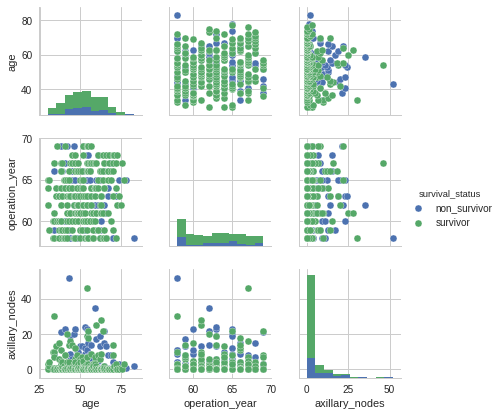

In [78]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(canc_dataset, hue="survival_status", size=2);
plt.show()

**Observations :**
* From scatter plot and pair plot we can say that none of the features has any correlation with other features.
* Given two classes are not linearly separable with any combination of two features present in dataset.